### Тема: "Обучение без учителя"

#### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:

n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [1]:
# Импортируйте библиотеки pandas, numpy и matplotlib.

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

plt.style.use('fivethirtyeight')

%config InlineBacked.figure_format = 'svg'
%matplotlib inline

In [2]:
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
boston = load_boston()

data = boston["data"]
target = boston["target"]
feature_names = boston["feature_names"]


In [3]:
# создайте датафреймы X и y из этих данных
X = pd.DataFrame(data, columns = feature_names)

y = pd.DataFrame(target)

In [4]:
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) 
# с помощью функции train_test_split так, 
# чтобы размер тестовой выборки составлял 20% от всех данных, 
# при этом аргумент random_state должен быть равен 42.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Масштабируйте данные с помощью StandardScaler.
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [6]:
# Постройте модель TSNE на тренировочный данных с параметрами:
# n_components=2, learning_rate=250, random_state=42.

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


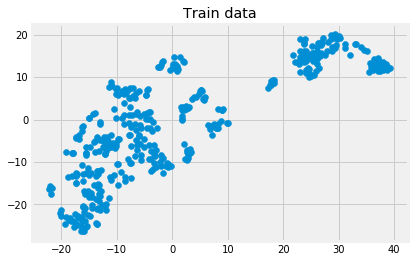

In [8]:
# Постройте диаграмму рассеяния на этих данных
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.title('Train data')

plt.show()

#### Задание 2